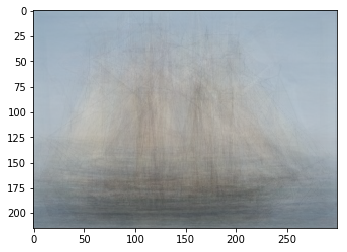

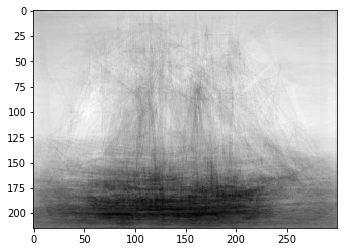

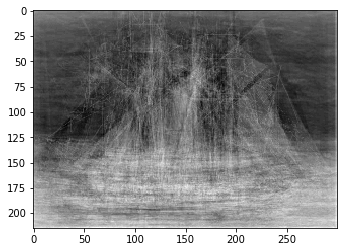

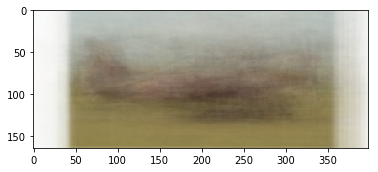

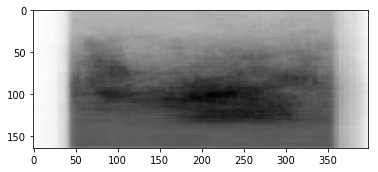

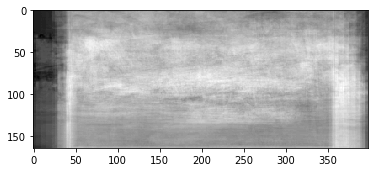

In [27]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import os

def compute_image_means (dir_path) :
    try :
        # save cwd
        original_cwd = os.getcwd()
        # change cwd to image collection directory
        os.chdir(dir_path)
        # get all non-hidden image names
        image_names = [fn for fn in os.listdir() if fn[0] != '.']

        images = [Image.open(fn) for fn in image_names]

        # DO COLOR IMAGE MEAN
        image_count = len(images)
        # we need to reverse the image size tuple so as to be in the form (height, width)
        image_size = images[0].size[::-1]
        average_color_im = np.zeros(image_size + (3,))
        for im in images :
            im_data = np.asarray(im)
            average_color_im = np.add(average_color_im, im_data / image_count)

        average_color_im = average_color_im.astype(np.uint8)
        
        plt.imshow(average_color_im)
        plt.show()
        
        # DO INTENSITY MEAN
        gray_images = [im.convert('L') for im in images]
        
        average_intens_im = np.zeros(image_size)
        for im in gray_images :
            im_data = np.asarray(im)
            average_intens_im = np.add(average_intens_im, im_data / image_count)
            
        average_intens_im = average_intens_im.astype(np.uint8)
        
        plt.imshow(average_intens_im, 'gray')
        plt.show()
        
        # INTESITY MEAN STD
        im_data_array = [np.asarray(a) for a in gray_images]
        im_data_array = np.array(im_data_array)
        
        pixel_std = np.std(im_data_array, 0)
                
        plt.imshow(pixel_std.astype(np.uint8), 'gray')
        plt.show()
                
        #TODO return PIL image
        # wrap the image data into an Image object
        #final_im = Image.new('RGB', images[0].size)
        #final_im.putdata(average_color_im)
        #return average_im

    finally :
        # return to the original cwd
        os.chdir(original_cwd)
    

im_collection_path = './colectiiImagini/'
# keep only non-hidden folders
im_collections = [fn for fn in os.listdir(im_collection_path) if fn[0] != '.']
compute_image_means(im_collection_path + im_collections[0])
compute_image_means(im_collection_path + im_collections[1])